<a href="https://colab.research.google.com/github/bcataldo3/plantilla_curso_python/blob/main/docs/Clase_02 - R - Modelos Conglomerados - Introduccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Conglomerados - Introducción

## ¿Donde Se utilizan?

También conocidos como modelos de clustering o de agrupación, estos modelos son una de las operaciones más básicas en la investigación científica. Es particularmente importante en las ciencias sociales, donde a menudo se carece de una teoría integral y el primer paso en la investigación suele ser detectar algún tipo de patrón en los datos. Los métodos de clasificación se han utilizado durante mucho tiempo en biología, donde la agrupación de individuos según especie y género ha sido la base de muchos trabajos posteriores. La siguiente lista altamente selectiva ilustra por qué podríamos estar interesados en encontrar grupos y qué propósitos prácticos podrían servir.

* Marketing. Es probable que el correo directo sea más efectivo si se dirige a personas con características similares que probablemente respondan de la misma manera. La segmentación del mercado, como se le llama, tiene como objetivo dividir la población objetivo en grupos (segmentos) para que cada uno pueda ser objetivo de la manera más probable de lograr una respuesta positiva.

* Arqueología. Es probable que los artefactos hechos aproximadamente al mismo tiempo o por el mismo grupo de personas sean más similares que los que se originaron en diferentes épocas o pueblos. Formando grupos de objetos similares, puede ser posible reconstruir algo de la historia de una región.

* Educación. Las escuelas varían en su desempeño, y al buscar las razones de esa variación, puede ser útil agrupar las escuelas para que uno pueda preguntarse qué tienen en común aquellas que parecen ser similares en términos generales.

* Finanzas y economía: En finanzas se usan los modelos no supervisados de clasificación para el agrupamiento de activos financieros para identificar patrones de comportamiento y riesgos compartidos. También se pueden utilizar para la clasificación de perfiles de inversores en función de su tolerancia al riesgo y objetivos financieros.

* Ciencias sociales: Una utilidad bien común es el análisis de sentimientos y clasificación de opiniones en redes sociales para comprender la opinión pública y las tendencias. También se usan para el agrupamiento de datos demográficos para identificar segmentos de población con características similares y en el ámbito más académico para la clasificación de textos en estudios de ciencias sociales para analizar discursos y temáticas emergentes.

* Recursos humanos: Acá tenemos modelos para el agrupamiento de perfiles de empleados basados en habilidades y competencias para identificar grupos de talento y necesidades de desarrollo, la clasificación de currículums vitae para identificar candidatos adecuados para puestos de trabajo específicos, y la detección de patrones de rotación y retención de empleados basados en datos históricos.

## Multidimensionalidad de los Modelos de Conglomerados

El problema al que apunta el análisis de conglomerados es agrupar a individuos de tal manera que aquellos asignados a un grupo en particular estén, de alguna manera, cercanos entre sí. Es sencillo hacer esto si los objetos se caracterizan por una única cantidad mensurable, como el ingreso. Todo lo que tenemos que hacer es agrupar a aquellos individuos que tengan ingresos similares. Es cierto que tendremos que decidir qué significa *similar*, pero eso estará determinado por el uso que pretendamos darle a la clasificación. Vamos a generar la siguiente data simulada de ingresos y edades para explicar lo que viene.

In [1]:
# Instalar y cargar librerías
library(dplyr)

set.seed(1000)  # Establecer semilla

large <- 100
name_income <- 'Annual Income'
name_age <- 'Age'

# Generar datos
annual_incomes <- rbeta(n = large, shape1 = 2, shape2 = 5) * 100000
ages <- annual_incomes / 1000 + rnorm(n = large, mean = 0, sd = 5)

# Crear DataFrame y modificarlo
df <- data.frame(ID = 1:large,
                 Annual_Income = round(annual_incomes, 2),
                 Age = round(ages))

df <- df %>%
  mutate(`Age` = ifelse(Age < 20, Age + runif(n(), 20, 30), Age),
         `Age` = ifelse(Age > 70, Age - runif(n(), 5, 15), Age),
         Annual_Income = pmax(Annual_Income, 0),
         `Age` = round(Age))

Si tenemos, por ejemplo, una única variable, podemos discernir fácilmente entre distintos grupos. En la data anterior, supongamos que quiero dividir por ingresos. Bastaría con ver una distribución de la data, junto con el ojo humano y una orientación de lo que necesito segmentar para poder evaluar como agruparé a las personas.

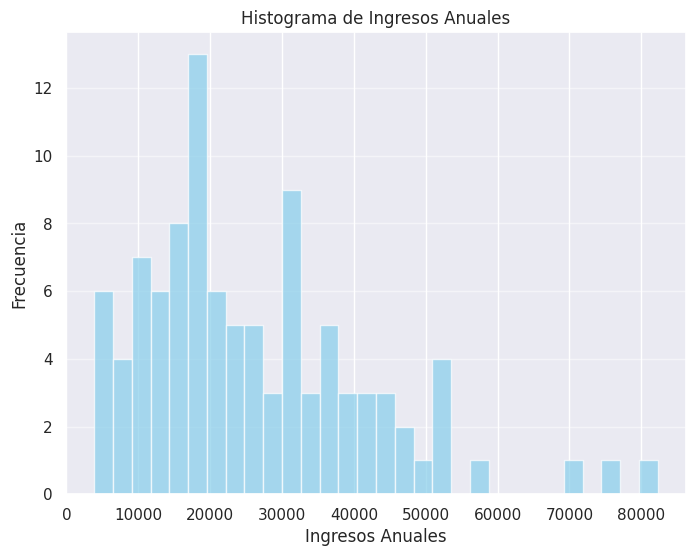

In [4]:
# Instalar y cargar ggplot2
install.packages("ggplot2")
library(ggplot2)

# Histograma de Ingresos Anuales
ggplot(df, aes(x = Annual_Income)) +
  geom_histogram(bins = 30, fill = 'skyblue', alpha = 0.7) +
  labs(title = 'Histograma de Ingresos Anuales', x = 'Ingresos Anuales', y = 'Frecuencia') +
  theme_minimal()

El problema se vuelve más difícil si los juicios de similitud son subjetivos o se basan en un gran número de características de los objetos. Por ejemplo, al juzgar la similitud de dos escuelas, típicamente habrá todo un conjunto de características posiblemente relevantes, como el tamaño, la ubicación, la mezcla étnica, y así sucesivamente. La pregunta entonces es cómo resumimos estos diversos fragmentos de información para poder hacer juicios de similitud defendibles. Es esta característica la que hace del análisis de conglomerados una técnica multivariada.

Para comprender qué implica basar juicios de distancia en más de una variable, consideremos el caso en el que tenemos dos variables medidas en una escala continua. Si los *"objetos"* fueran personas, podríamos imaginar que tenemos registros que proporcionan sus edades e ingresos, y que queremos agruparlos en función de esas dos variables. Supongamos que representamos a los individuos como puntos en el plano. Entonces, su posición podría aparecer como la siguiente imagen.

<img src="https://drive.google.com/uc?export=view&id=17eFMTmuosi7IjhtegOlji0o6A-Qzp_UD" width = "500" align="center"/>

Si hubiera algún agrupamiento presente, lo reconoceríamos de inmediato en la figura. En este caso, hay tres de esos agrupamientos que identificamos utilizando la capacidad del ojo para detectar patrones de agrupamiento, mientras que detectamos 3 grupos aislados o compuestos de un solo dato.

Con tres variables, podríamos imaginar puntos representados en tres dimensiones, pero más allá de eso nuestra capacidad de visualización falla y necesitamos alguna otra forma de reconocer los agrupamientos.

Importante es destacar que, si tuviéramos información solo sobre una de estas variables (por ejemplo el ingreso), solo veríamos dos agrupamientos, ya que sería difícil separar los dos grupos de edad con bajos ingresos. Esto ilustra cómo el análisis de datos multivariados puede revelar más que el análisis de cada variable por separado. Ahora dejamos el código que realiza la imágen anteriormente mostrada.

```R
ggplot(df, aes(x = Annual_Income, y = Age)) +
  geom_point(aes(size = Annual_Income / 5000), alpha = 0.5) +
  labs(title = 'Distribución de Puntos: Ingresos Anuales vs. Edad', x = 'Ingresos Anuales', y = 'Edad') +
  theme_minimal()

```

## Formas de Clasificar

Entendemos ahora que estos agrupamientos o conglomerados se forman con base en la similitud de características o atributos de los datos. Dos enfoques comunes son el agrupamiento rígido (hard clustering) y el agrupamiento suave (soft clustering), los cuales difieren principalmente en la forma en que asignan puntos de datos a los conglomerados.

+ Hard Clustering: En el hard clustering, también conocido como clustering rígido o partición rígida, **cada punto de datos pertenece estrictamente a un solo grupo. En otras palabras, se asigna cada punto de datos a un grupo específico de manera exclusiva**. El algoritmo de hard clustering busca dividir el conjunto de datos en un número predeterminado de clusters, donde cada punto de datos es miembro de exactamente un grupo. El ejemplo más común de hard clustering es el algoritmo K-Medias, que veremos más adelante.

+ Soft Clustering: En contraste, el soft clustering, también conocido como fuzzy clustering o agrupamiento difuso, **permite que un punto de datos pertenezca parcialmente a múltiples clusters simultáneamente**. Cada punto de datos se asigna a diferentes clusters con **diferentes grados de pertenencia**, representados por valores de membresía que indican la probabilidad o grado de pertenencia de ese punto a cada grupo. Un ejemplo común de soft clustering es el algoritmo Fuzzy C-Means, que asigna grados de pertenencia a cada punto de datos en lugar de asignarlos estrictamente a un solo grupo.

En resumen, la principal diferencia radica en la forma en que se asignan los puntos de datos a los grupos. Mientras que el hard clustering asigna cada punto a un cluster exclusivo, el soft clustering permite grados de pertenencia, lo que significa que un punto puede tener cierta pertenencia a múltiples clusters simultáneamente en diferentes grados. La elección entre estos métodos depende de la naturaleza de los datos y del contexto específico de aplicación.

## Convexidad
En el contexto de los modelos de conglomerados, la convexidad se refiere a una propiedad matemática que algunos algoritmos de agrupamiento pueden aprovechar para definir y separar grupos de datos de manera más efectiva. La convexidad se relaciona con la forma en que se definen y se separan los límites entre los diferentes grupos. Un conjunto de datos se considera convexo si, para cualquier par de puntos dentro de ese conjunto, la línea recta que los une también está completamente contenida dentro del conjunto. En otras palabras, **si tomas dos puntos dentro de un conjunto convexo, todos los puntos a lo largo del camino más corto entre ellos también estarán dentro del conjunto**.

En términos de modelos de conglomerados, la convexidad se usa a menudo para describir la forma en que se agrupan los datos. Algunos algoritmos de clustering asumen la convexidad de los grupos, lo que significa que estos algoritmos funcionan mejor cuando los grupos tienen formas más simples y convexas, como esferas, elipsoides o hiperplanos.

Sin embargo, es importante tener en cuenta que no todos los conjuntos de datos se ajustan a la convexidad. **Los datos del mundo real a menudo pueden tener formas más complejas y no convexas**. En tales casos, los algoritmos que asumen convexidad pueden no ser los más apropiados, y es posible que se prefieran métodos de agrupación más flexibles, como el clustering jerárquico, DBSCAN o algoritmos basados en densidad que pueden identificar grupos con formas más irregulares y no convexas en los datos.


## Requisitos del Modelo de Conglomerados

En este ejemplo, la distancia entre un par de individuos se define simplemente como su distancia en la figura. Sin embargo, la información que tenemos puede no estar en forma de mediciones en una escala continua. Puede, por ejemplo, indicar simplemente si los individuos poseen o no un atributo particular. En tales casos, la representación geométrica no está disponible y se debe realizar un trabajo preliminar para decidir cómo medir su distancia.
Aunque este ejemplo es rudimentario, sirve para identificar los dos pasos básicos en cualquier análisis de conglomerados:

1. **La medición de la distancia entre todos los pares de objetos**.
2. **El desarrollo de una rutina o algoritmo para formar agrupamientos en base a esas distancias**.

Las distancias en el punto (1) pueden determinarse de manera subjetiva o mediante la creación de una medida de distancia basada en la observación de una colección de variables. En el primer caso, es el cerebro humano el que procesa la información multivariada disponible en cada objeto; en el segundo caso, la distancia se construye de acuerdo con algún principio racional.

Antes de continuar, necesitamos aclarar el significado del término *"distancia"* que hemos utilizado para describir qué tan separados están los objetos. A veces es más natural pensar en términos de cercanía o proximidad. Alternativamente, se utilizan los términos **similitud y disimilitud**. Estos últimos tienen la ventaja de sugerir una evaluación de distancia más flexible y subjetiva que es más apropiada para algunas de las aplicaciones que encontraremos. La proximidad y la similitud están inversamente relacionadas con la distancia y la disimilitud, por lo que las medidas de una se pueden convertir fácilmente en medidas de la otra. Utilizaremos los diversos términos indistintamente, pero consideraremos "distancia" como el término principal porque también es fundamental para el escalado multidimensional que veremos posteriormente.

### Matriz de Distancias

La primera etapa del análisis de conglomerados es la construcción de distancias entre pares de objetos. Pospondremos la discusión sobre cómo se hace esto hasta más adelante, momento en el que tendremos una idea más clara de cómo se van a utilizar. Por ahora, observamos que el proceso de agrupamiento en sí comienza con una matriz de distancias, que es una matriz en la que la distancia entre el objeto $i$ y el objeto $j$ aparece en la fila $i$ y la columna $j$. Por ejemplo, si tenemos cuatro objetos, como muestra la siguiente imagen.



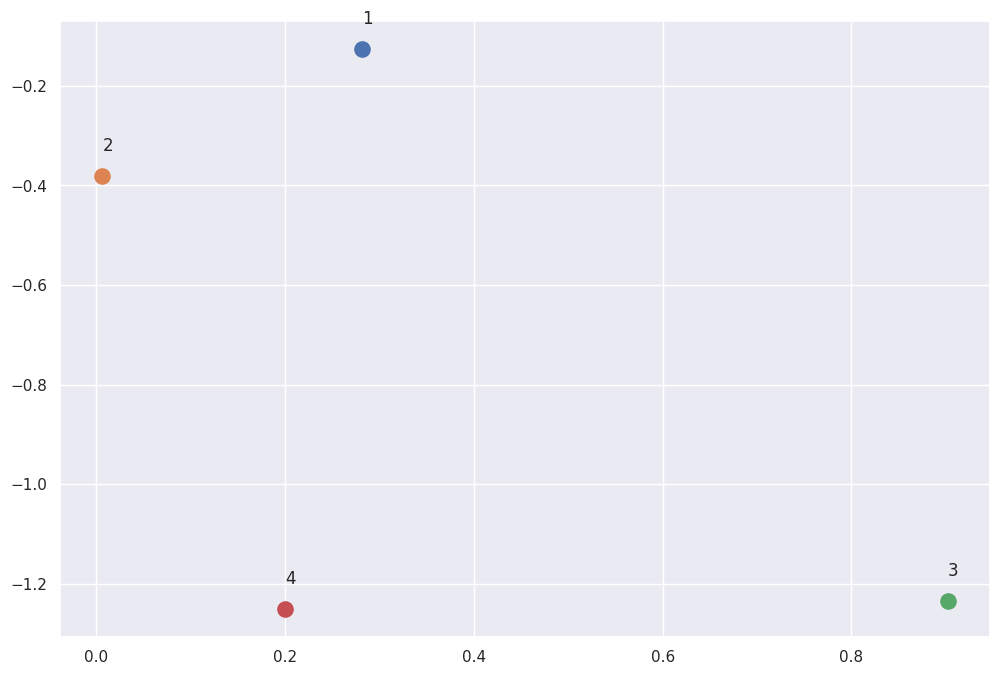

In [3]:
set.seed(1000)
nb_samples <- 4
nb_centers <- 1
X <- matrix(rnorm(2 * nb_samples), ncol = 2)
colnames(X) <- c("X1", "X2")

plot(X, col = 1:nb_samples, pch = 16, cex = 2, xlab = "X1", ylab = "X2")
text(X, labels = 1:nrow(X), pos = 3)

Tenemos una matriz de distancias de 4 × 4.

$\begin{Bmatrix}
\delta_{1,1} & \delta_{1,2} & \delta_{1,3} & \delta_{1,4} \\
\delta_{2,1} & \delta_{2,2} & \delta_{2,3} & \delta_{2,4} \\
\delta_{3,1} & \delta_{3,2} & \delta_{3,3} & \delta_{3,4} \\
\delta_{4,1} & \delta_{4,2} & \delta_{4,3} & \delta_{4,4} \\
\end{Bmatrix}$

Donde $\delta_{i,j}$ es la distancia entre el objeto $i$ y el objeto $j$. Por lo general, la matriz de distancias será simétrica, es decir, $\delta_{1,2}=\delta_{2,1}$,  $\delta_{1,3}=\delta_{3,1}$, y así sucesivamente. Esto se debe a que las evaluaciones de distancia generalmente no dependen del orden en que tomamos los dos objetos. Por esta razón, solo es necesario escribir la mitad de los δ, ya sea los que están en el triángulo superior o los que están en el triángulo inferior de la matriz. La diagonal puede dejarse en blanco porque estos elementos no desempeñan ningún papel en el proceso de agrupamiento. A veces, los $δ_{ij}$ se denominan distancias observadas o simplemente observaciones. Dejamos el código que ejecuta la imagen anteriormente mostrada.

## Tipos de Modelos

En cuanto a los algoritmos para formar agrupamientos, los métodos de análisis de conglomerados se pueden clasificar ampliamente como **jerárquicos o no jerárquicos**. En un método jerárquico, el proceso de agrupamiento produce una jerarquía en la que los subconjuntos de agrupamientos en un nivel se agregan para formar los agrupamientos en el siguiente nivel superior. Los métodos jerárquicos a su vez se pueden dividir en métodos **aglomerativos y métodos divisivos**. En un método aglomerativo, comenzamos tratando cada objeto como un agrupamiento de un solo miembro, y luego procedemos en una serie de pasos para fusionar agrupamientos. En este método, una vez que un par de individuos se ha unido en un agrupamiento, nunca se pueden separar posteriormente. Esto se debe a que cualquier nuevo agrupamiento se forma a partir de agrupamientos ya creados en etapas anteriores del proceso. En un método divisivo, comenzamos por el otro extremo, tratando al conjunto completo de individuos como un solo agrupamiento y luego procedemos dividiendo los agrupamientos existentes. Una vez que un par de individuos se ha separado en tal proceso, nunca pueden volver a unirse. Esto hace posible, como veremos a continuación, representar las etapas del proceso mediante un diagrama de árbol en el que los puntos de ramificación indican dónde se unen o se separan los agrupamientos.

En los métodos no jerárquicos, los agrupamientos se forman ajustando la membresía de los agrupamientos existentes en cualquier etapa del proceso mediante el movimiento de individuos hacia dentro o hacia fuera. Típicamente, estos métodos son más difíciles de llevar a cabo y se utilizan con menos frecuencia.
